# NSL Notebook 07

## Exercise 07.1


In [3]:
######                        #######
##  IMPORT DEFAULT PKGS and VARS   ##
######                        #######

from default import *

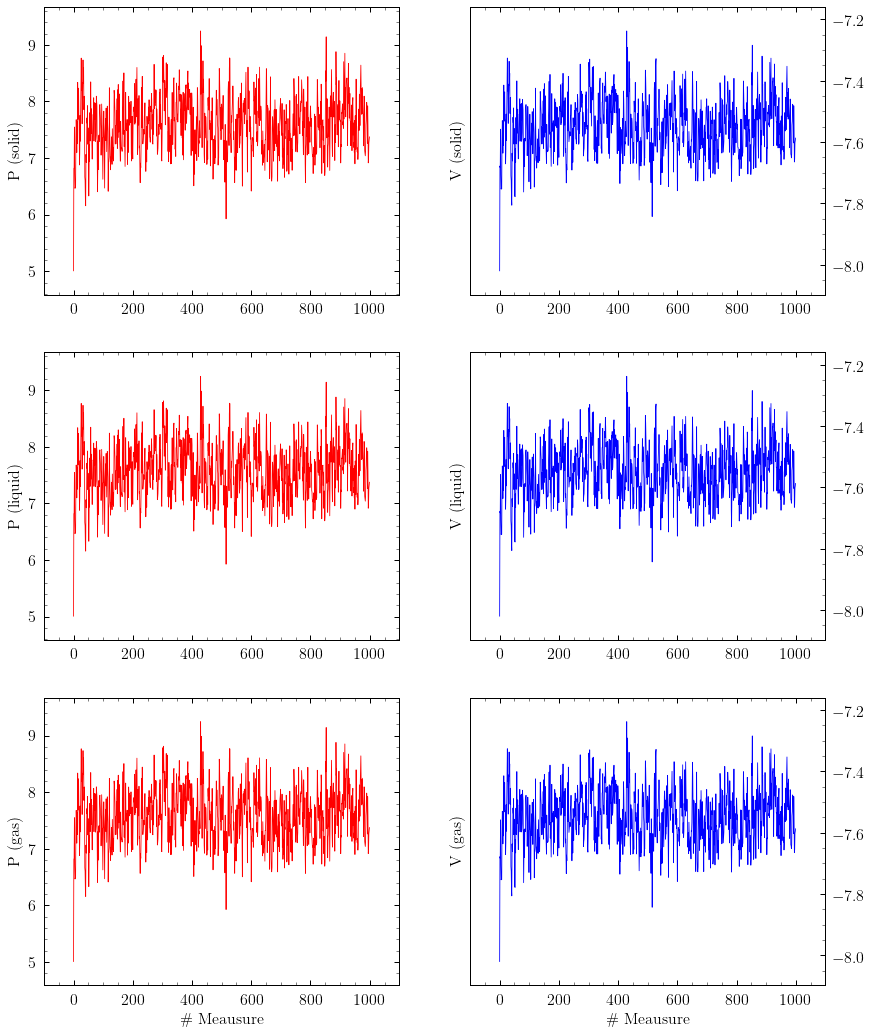

In [31]:
from itertools import cycle
df = dict()
yy = dict()
states = ["solid", "liquid", "gas"]
vv = ['P', 'V']
cc = cycle("rb")

# load equilibrium oscillation
for state in states:
    df[state] = dict()
    dfa = pd.read_csv(f"th-{state}.tsv", header=None, sep='\t', names=['P', 'V'])
    for v in vv:
         df[state][v] = dfa[v]
            
for v in vv:
    df["solid"][v] = df["solid"][v][:1000]
    df["liquid"][v] = df["solid"][v][:1000]
    df["gas"][v] = df["solid"][v][:5000]
        

fig, ax = plt.subplots(3, 2, figsize=(14,18));
ax = np.asarray(ax)
ax.shape = (1,6)
ax = ax[0]

ix=0
for state in states:
    for v in vv:
        df[state][v].plot.line(c=next(cc), lw=0.8, ax=ax[ix]);
        ax[ix].yaxis.tick_right() if (ix+1) % 2 == 0 else 0
        ax[ix].set_ylabel(f"{v} ({state})");
        ix += 1
    
ax[4].set_xlabel("\# Meausure");
ax[5].set_xlabel("\# Meausure");

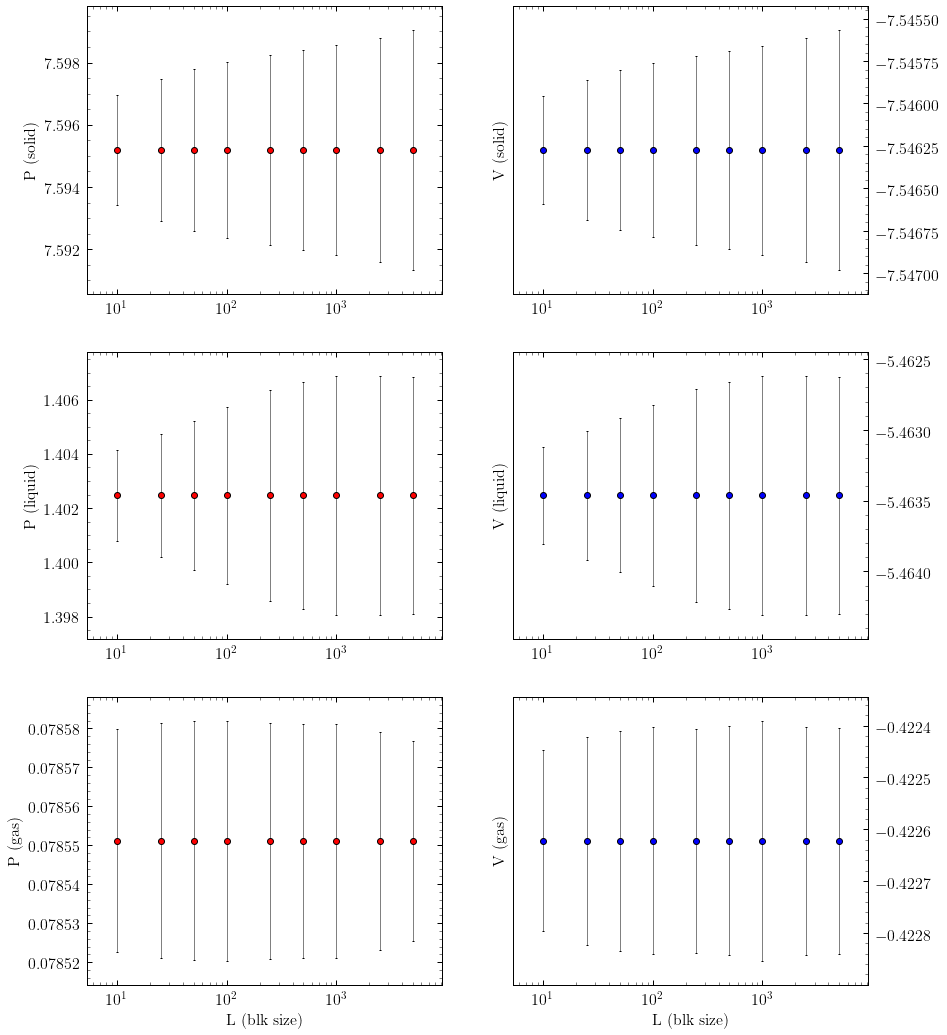

In [30]:
for state in states:
    df[state] = dict()
    for v in vv:
        df[state][v] = pd.read_csv(f"{v}-{state}-blk-evo.csv", header=None, sep=',', names=[v,'e'])

fig, ax = plt.subplots(3, 2, figsize=(14,18));

ax = np.asarray(ax)
ax.shape = (1,6)
ax = ax[0]

L = [10, 25, 50, 100, 250, 500, 1000, 2500, 5000]

ix=0
for state in states:
    for v in vv:
        ax[ix].errorbar(L, df[state][v][v], yerr=df[state][v]['e'], ls="", marker='o', mfc=next(cc), ecolor='gray')
        ax[ix].yaxis.tick_right() if (ix+1) % 2 == 0 else 0
        ax[ix].set_ylabel(f"{v} ({state})")
        ax[ix].set_xscale('log')
        ix += 1
        
ax[4].set_xlabel("L (blk size)");
ax[5].set_xlabel("L (blk size)");

## Exercise 04.2 04.3

Importing `*-solid-blk.csv` `*-liquid-blk.csv` `*-gas-blk.csv` and plot using SI

In [3]:
df = dict()
ee = 120 * 1.3806488e-23 * (1.602176565e-19)**-1 * 10**3 # meV energy
SI = {'T': 120, 'K': ee, 'V': ee, 'E': ee}

for state in ["solid", "liquid", "gas"]:
    df[state] = dict()
    for ch in "TKVE":
        df[state][ch] = pd.read_csv(f"{ch}-{state}-blk.csv", header=None, names=['v','e'])
        df[state][ch] = df[state][ch] * SI[ch]

### Solid Argon

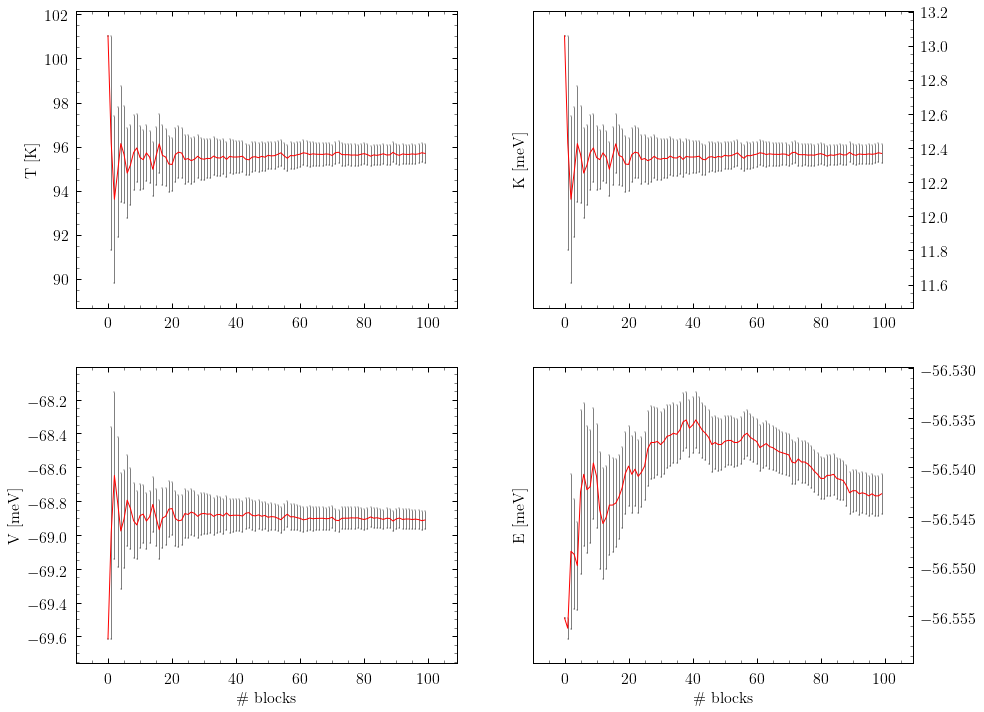

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(15,12));

ax = np.asarray(ax)
ax.shape = (1,4)
ax = ax[0]

for ix, ch in enumerate("TKVE"):
    df["solid"][ch]['v'].plot.line(yerr=df["solid"][ch]['e'], color='r', ecolor='gray', capthick=0.3, ax=ax[ix]);
    ax[ix].set_ylabel(f"{ch} [K]") if (ix == 0) else ax[ix].set_ylabel(f"{ch}  [meV]")
    ax[ix].yaxis.tick_right() if (ix == 1 or ix == 3) else 0
    ax[ix].set_xlabel('\# blocks') if (ix == 2 or ix == 3) else 0

### Liquid Argon

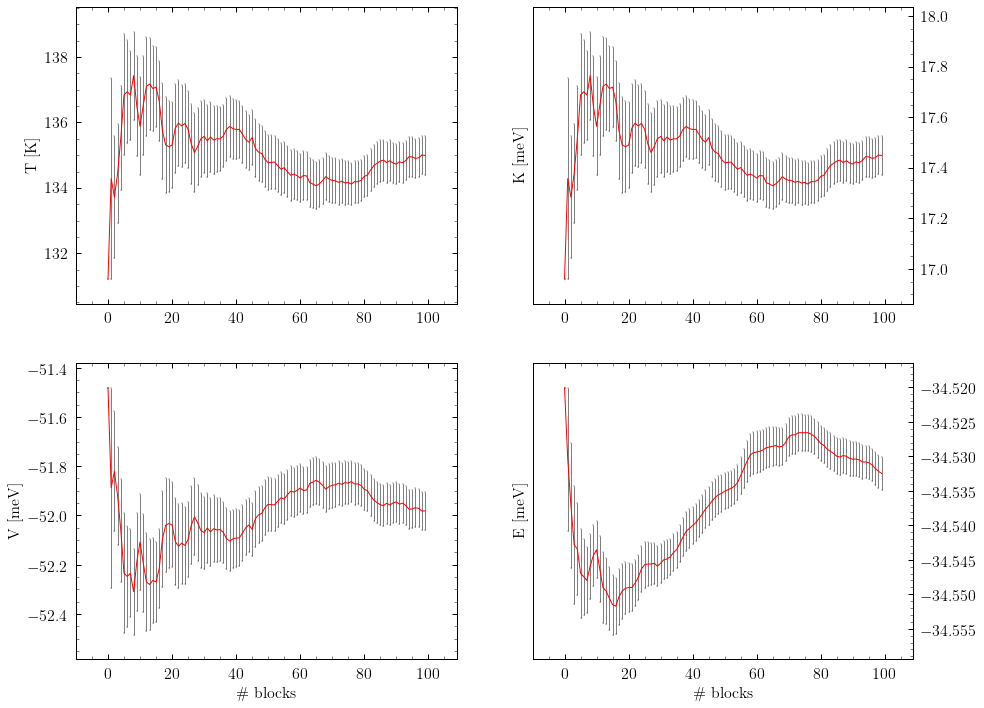

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(15,12));

ax = np.asarray(ax)
ax.shape = (1,4)
ax = ax[0]

for ix, ch in enumerate("TKVE"):
    df["liquid"][ch]['v'].plot.line(yerr=df["liquid"][ch]['e'], color='r', ecolor='gray', capthick=0.3, ax=ax[ix]);
    ax[ix].set_ylabel(f"{ch} [K]") if (ix == 0) else ax[ix].set_ylabel(f"{ch}  [meV]")
    ax[ix].yaxis.tick_right() if (ix == 1 or ix == 3) else 0
    ax[ix].set_xlabel('\# blocks') if (ix == 2 or ix == 3) else 0

### Gas Argon

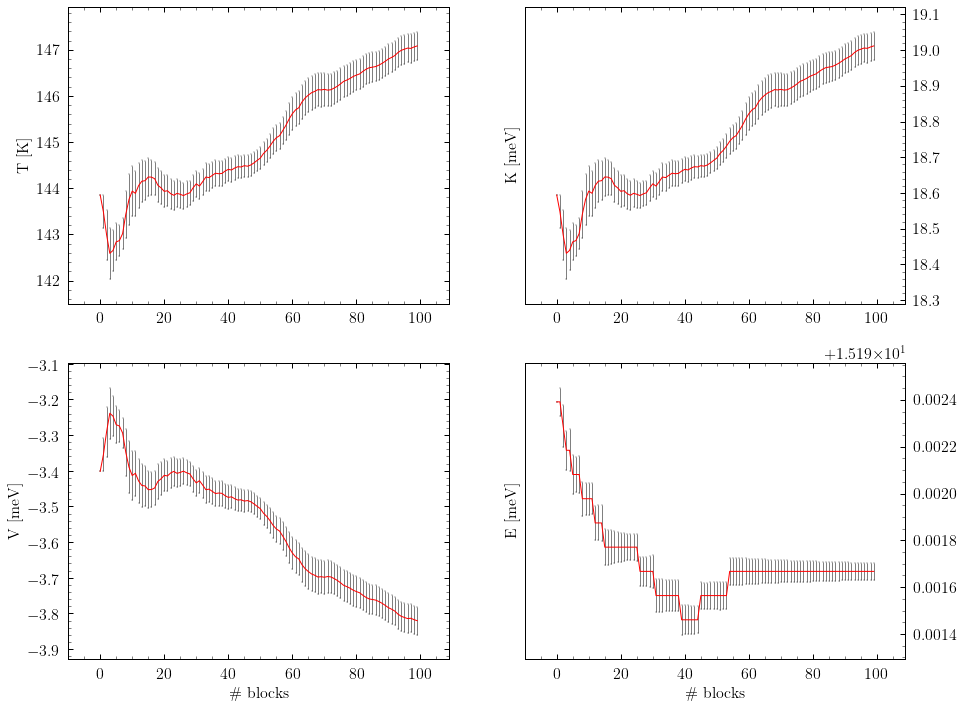

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(15,12));

ax = np.asarray(ax)
ax.shape = (1,4)
ax = ax[0]

for ix, ch in enumerate("TKVE"):
    df["gas"][ch]['v'].plot.line(yerr=df["gas"][ch]['e'], color='r', ecolor='gray', capthick=0.3, ax=ax[ix]);
    ax[ix].set_ylabel(f"{ch} [K]") if (ix == 0) else ax[ix].set_ylabel(f"{ch}  [meV]")
    ax[ix].yaxis.tick_right() if (ix == 1 or ix == 3) else 0
    ax[ix].set_xlabel('\# blocks') if (ix == 2 or ix == 3) else 0